*The description of the data set:**
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

In [33]:
import pandas as  pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


In [34]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"
df = pd.read_csv(file_name)

df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [35]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [36]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [37]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [40]:
df.rename(columns= {"Promotion" : "Campaign"}, inplace=True)
#this name is more suitable, I associate promotion with position change 

# EDA 

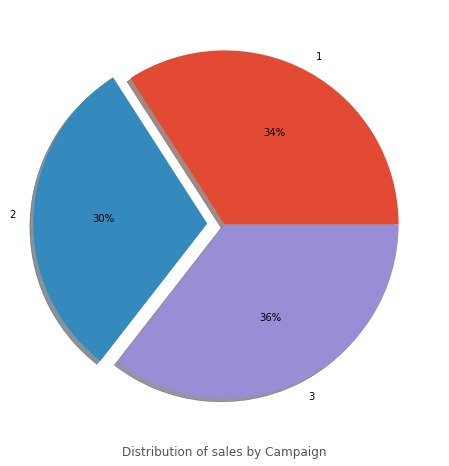

In [45]:
ax = df.groupby("Campaign").sum()['SalesInThousands'].plot(
    figsize=(8,8),
    kind = "pie",
    autopct='%1.0f%%',
    shadow=True,
    explode = (0,0.1,0)
)

ax.set_ylabel('')
ax.set_xlabel("Distribution of sales by Campaign")
plt.show()

In [50]:
df.groupby(['Campaign','MarketSize']).count()["MarketID"].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaign,,,
1,56,96,20
2,64,108,16
3,48,116,24


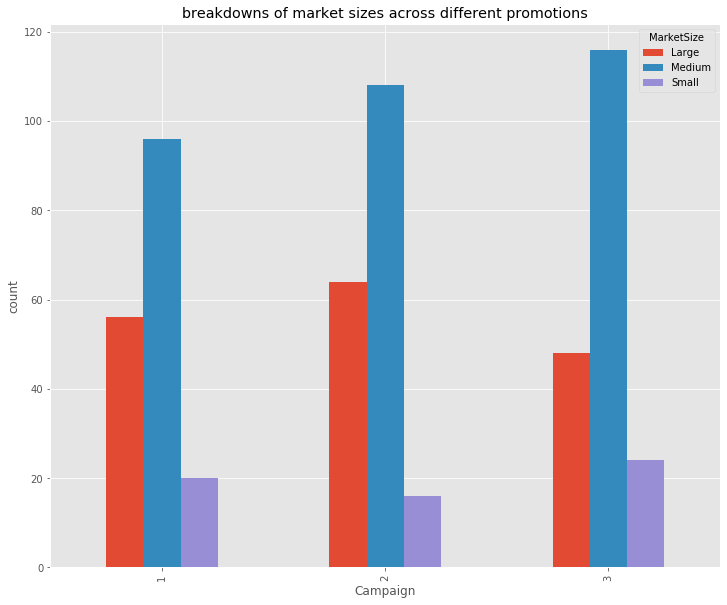

In [52]:
ax = df.groupby(['Campaign', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

Text(0.5, 1.0, 'Overall Distribution Store Ages')

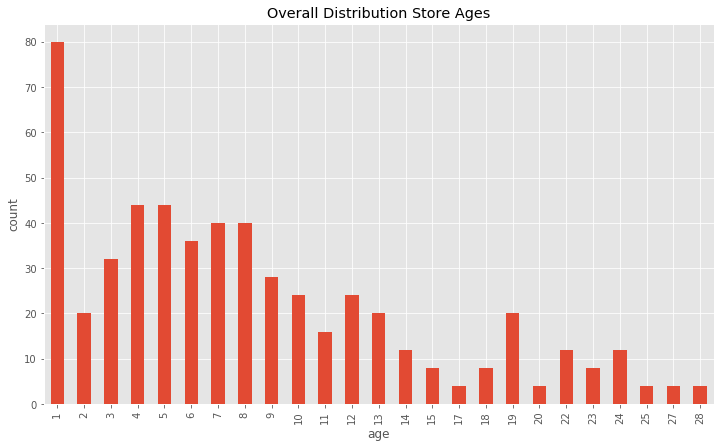

In [54]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar',
    figsize=(12,7),
    grid=True
)

ax.set_xlabel("age")
ax.set_ylabel("count")
ax.set_title('Overall Distribution Store Ages')